In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
#读取图片
def ImageRead(path):
    img = cv2.imread(path,1)
    print(np.shape(img))
    return img

In [3]:
def MaskImg(mask,img):
    result = img.copy()
    H, W, C = result.shape
    print(mask)
    for w in range(W):
        for h in range(H):
            if mask[h,w]==0:
                result[:, :, 0][h,w] =163
                result[:, :, 1][h,w] =47
                result[:, :, 2][h,w] =0
    return result 

In [4]:
# 根据欧式距离确定范围
def Euclid(img, box, d0):
    rows, cols, C = img.shape
    a = np.zeros(C, dtype='float')
    mask = np.zeros((rows, cols), dtype='float')
    for c in range(C):
        a[c] = np.mean(img[box[0]:box[2], box[1]:box[3] ,c])
    a = a.reshape(C, 1)
    for r in range(rows):
        for c in range(cols):
            z = img[r, c, :].reshape(C, 1)
            d = z - a
            DE = np.dot(d.T, d)
            if DE.sum() <= d0:
                mask[r,c]=1
    mask_img = MaskImg(mask,img)
    return mask, mask_img

In [5]:
def Mask(mask1,mask2,mask3,mask4):
    mask=np.zeros_like(mask1)
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask1[i,j]!=0 or mask2[i,j]!=0 or mask3[i,j]!=0 or mask4[i,j]!=0:
                mask[i,j]=1
    return mask

In [6]:
path="./R-C.jpg"
img=ImageRead(path)
rows = int(img.shape[0]) 
cols = int(img.shape[1])

(470, 640, 3)


Text(0.5, 1.0, 'Only fish')

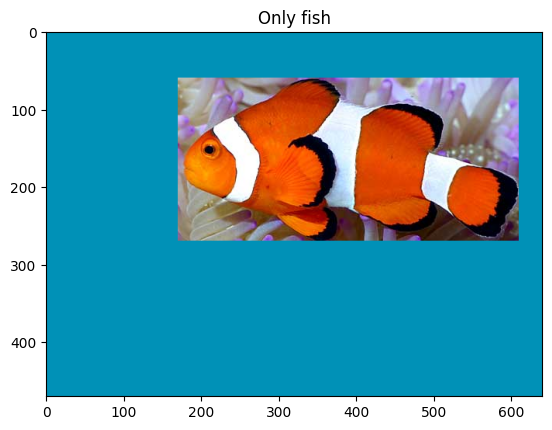

In [7]:
#框出鱼
maskfish = np.zeros((rows, cols))
maskfish[60:270,170:610]=1
for r in range(rows):
    for c in range(cols):
        if maskfish[r,c]==0:
            img[:, :, 0][r,c] =183
            img[:, :, 1][r,c] =145
            img[:, :, 2][r,c] =0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Only fish")

In [8]:
bndbox1 = {'xmin': 130,'ymin': 420,'xmax': 205,'ymax': 480}
bndbox2 = {'xmin': 180, 'ymin': 250, 'xmax': 205, 'ymax': 270}
bndbox3 = {'xmin': 180, 'ymin': 360, 'xmax': 200, 'ymax': 370}
bndbox4 = {'xmin': 200, 'ymin': 370, 'xmax': 220, 'ymax': 390}

In [9]:
mask1e, mask1e_maskimg = Euclid(img, list(bndbox1.values()),11000)#7
mask2e, mask2e_maskimg = Euclid(img, list(bndbox2.values()),2500)#0.6
mask3e, mask3e_maskimg = Euclid(img, list(bndbox3.values()),2000)#3
mask4e, mask4e_maskimg = Euclid(img, list(bndbox4.values()),300)#0.5 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


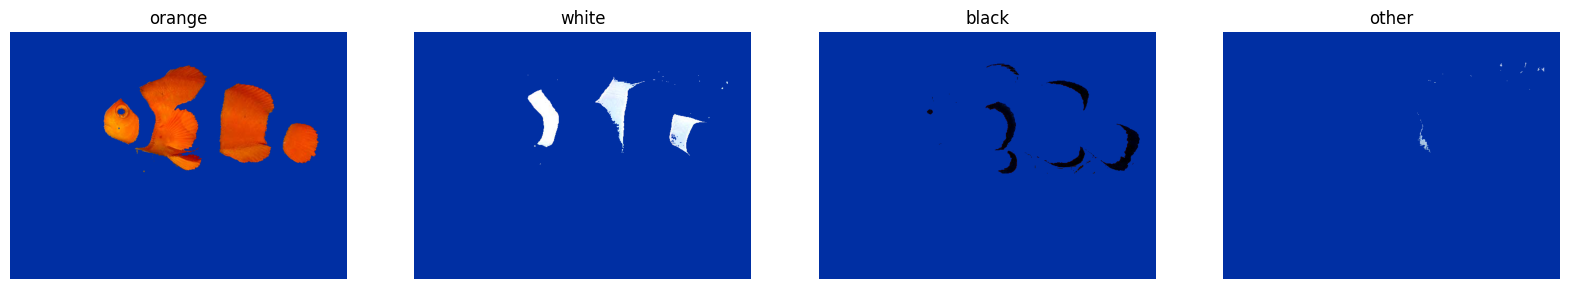

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(cv2.cvtColor(mask1e_maskimg, cv2.COLOR_BGR2RGB))
axs[0].set_title('orange')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(mask2e_maskimg, cv2.COLOR_BGR2RGB))
axs[1].set_title('white')
axs[1].axis('off')
axs[2].imshow(cv2.cvtColor(mask3e_maskimg, cv2.COLOR_BGR2RGB))
axs[2].set_title('black')
axs[2].axis('off')
axs[3].imshow(cv2.cvtColor(mask4e_maskimg, cv2.COLOR_BGR2RGB))
axs[3].set_title('other')
axs[3].axis('off')
plt.show()

In [11]:
#总蒙版
maskEu=Mask(mask1e,mask2e,mask3e,mask4e)
resultEu=MaskImg(maskEu,img)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Result')

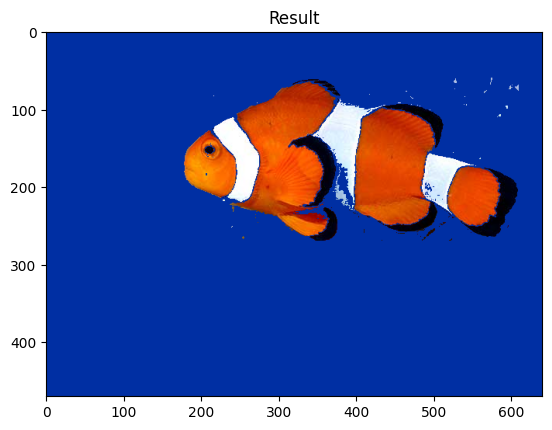

In [12]:
plt.imshow(cv2.cvtColor(resultEu, cv2.COLOR_BGR2RGB))
plt.title("Result")